In [1]:
import ipaddress
from ipaddress import ip_network
from ipaddress import IPv4Network 
from ipaddress import collapse_addresses
import itertools
import matplotlib.pyplot as plt
import matplotlib_venn
from matplotlib_venn import venn2

In [2]:
# Input for the programs is list of n sets of CIDR blocks
CIDR_blocks_input = [
['192.0.2.2/31', '192.0.2.0/32'],
['192.0.2.8/29', '192.0.2.4/30']]

In [3]:
# Convert list of IP's to IPv4 network elements
# Sort elements in each block
# Sort blocks
# Iterate over elements in CIDR block and check network format validity
# Assumption for the exercise: remove invalid IP networks and remove empty blocks 
# Check correlation level flag and set to default


CIDR_blocks = []
for block in CIDR_blocks_input:
    block.sort()
    temp_block = []
    for network in block:
        try:
            temp_block.append(ipaddress.IPv4Network(network))
        except (ValueError):
            print ('Removing invalid network ' + network)
            pass
#     print ('Block of elements before -->')
#     print (block)
#     print ('Block of elements after -->')
#     print (temp_block)
    CIDR_blocks.append(temp_block)
#     print ('---------------------')
    
    

In [4]:
# Loops through the addresses, collapsing concurrent netblocks.
# TODO - check if recursion to collapse blocks needed 

CIDR_blocks_collapsed = []
 
for block in CIDR_blocks:
    if block != []:
        collapsed_block = (list(ipaddress.collapse_addresses(block)))
        CIDR_blocks_collapsed.append(collapsed_block)
#         print ('Block of elements before -->')
#         print (block)
#         print ('Block of elements after -->')
#         print (collapsed_block)
#         print ('-------------------------------------')

                

**********************************************************************
*   1
**********************************************************************
block1: [IPv4Network('192.0.2.0/32'), IPv4Network('192.0.2.2/31')]
block2: [IPv4Network('192.0.2.4/30'), IPv4Network('192.0.2.8/29')]
**********************************************************************
network1: 192.0.2.0/32
network2: 192.0.2.4/30
Networks correlation: None
network1: 192.0.2.0/32
network2: 192.0.2.8/29
Networks correlation: None
network1: 192.0.2.2/31
network2: 192.0.2.4/30
Networks correlation: Adjacent
network1: 192.0.2.2/31
network2: 192.0.2.8/29
Networks correlation: None


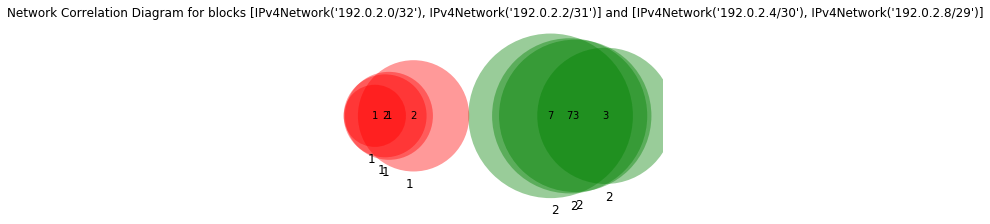

---> 4 Adjacent


-------------interactionMatrixDetailed------------------------
{0: [[IPv4Network('192.0.2.0/32'), IPv4Network('192.0.2.2/31')], [IPv4Network('192.0.2.4/30'), IPv4Network('192.0.2.8/29')], [[0, IPv4Network('192.0.2.0/32'), IPv4Network('192.0.2.4/30'), 0, 'None'], [1, IPv4Network('192.0.2.0/32'), IPv4Network('192.0.2.8/29'), 0, 'None'], [2, IPv4Network('192.0.2.2/31'), IPv4Network('192.0.2.4/30'), 4, 'Adjacent'], [3, IPv4Network('192.0.2.2/31'), IPv4Network('192.0.2.8/29'), 0, 'None']], 4, 'Adjacent']}
-------------interactionMatrixSummary-------------------------
{0: [[IPv4Network('192.0.2.0/32'), IPv4Network('192.0.2.2/31')], [IPv4Network('192.0.2.4/30'), IPv4Network('192.0.2.8/29')], 'Adjacent']}


In [5]:
# Create dictionality for combinations of the blocks and save with flags 
# The flags are on block level

d = {}
keyId = 0

interactionMatrix = {}
matrixKeyId = 0

# intersecting, contained, adjacent or none
flagDecode = {0:'None', 1:'Contained',3:'Intersecting', 4:'Adjacent'}
for block1, block2 in itertools.combinations(CIDR_blocks_collapsed, 2):
    
    
    print ('**********************************************************************')
    print ('*   ' + str(keyId + 1))
    print ('**********************************************************************')

    print ('block1: ' + str(block1))
    print ('block2: ' + str(block2))
    print ('**********************************************************************')

             
    blockMatrix = []
    blockLevelFlag = 99
    networkCombId = 0
    
    for network1, network2 in itertools.product(block1, block2):  
        
        networkLevelFlag = 0
        x = set(list(ip_network(network1).hosts()))
        # add the network address for /32
        x.add((ip_network(network1).network_address))
#       sort and deduplicate
        x = set(sorted(set(x))) 
    
        y = set(list(ip_network(network2).hosts()))
        # add the network address for /32
        y.add((ip_network(network2).network_address))
#       sort and deduplicate
        y = set(sorted(set(y)))
    
        z = x & y 
        
#         print ('x: ' + str(x))
#         print ('y: ' + str(y))
        
        venn2([x, y], set_labels = ('1', '2'))

#       check first pair
        if blockLevelFlag == 99:
            if set(z) == set():
                blockLevelFlag = 0
            elif(set(z) == set(x) or set(z)== set(y)): 
                blockLevelFlag = 1
            else:
                blockLevelFlag = 3

#       check next pairs
        else:
            if (set(z) == set() and (blockLevelFlag == 0 or blockLevelFlag == 4)):
                pass
            elif((set(z) == set(x) or set(z)== set(y)) and blockLevelFlag == 1): 
                pass
            else:
                blockLevelFlag = 3
#             print (blockLevelFlag)
        
        if set(z) == set():
            networkLevelFlag = 0
        elif(set(z) == set(x) or set(z)== set(y)): 
            networkLevelFlag = 1
        else:
            networkLevelFlag = 3

#       chech if adjacent 
        if networkLevelFlag == 0:
        
            x1 = [ip + 1 for ip in x]
            x2 = [ip - 1 for ip in x]

            a1 = set(x1) & y
            a2 = set(x2) & y
        
            if (a1 != set() or a2 != set()): 

#                 print ('************************')
#                 print ('a1: ' + str(a1))
#                 print ('a2: ' + str(a2))
                networkLevelFlag = 4
                
                if (blockLevelFlag) == 0:
                    blockLevelFlag = 4

        print ('network1: ' + str(network1))
        print ('network2: ' + str(network2))
        print ('Networks correlation: ' + flagDecode[networkLevelFlag])

                    
        blockMatrix.append([networkCombId , network1, network2,networkLevelFlag, flagDecode[networkLevelFlag]])
        networkCombId +=1   
                    
    plt.title("Network Correlation Diagram for blocks " + str(block1) + ' and ' + str(block2))
    plt.show()
       
    print('---> ' + str(blockLevelFlag) + ' ' + flagDecode[blockLevelFlag])
    print('\n')
    
    d[keyId] = [block1, block2, flagDecode[blockLevelFlag]]
    interactionMatrix[matrixKeyId] = [block1, block2, blockMatrix, blockLevelFlag, flagDecode[blockLevelFlag]]
    keyId +=1
    matrixKeyId +=1
    
print ('-------------interactionMatrixDetailed------------------------')
print (interactionMatrix)    
print ('-------------interactionMatrixSummary-------------------------')    
print (d)
